## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merged_df = pd.merge(mouse_metadata, study_results, how = "left", on = "Mouse ID")
# Display the data table for preview
merged_df.sample(10)



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1324,o926,Zoniferol,Male,15,29,40,59.903044,3
1121,l558,Ceftamin,Female,13,30,5,45.809089,0
459,a203,Infubinol,Female,20,23,25,56.793208,1
544,a699,Propriva,Female,5,28,15,49.530401,0
504,a401,Zoniferol,Female,8,25,15,49.934725,1
705,c757,Placebo,Male,9,27,40,66.604368,2
411,q597,Ramicane,Male,20,25,0,45.000000,0
154,c758,Ramicane,Male,9,17,45,33.397653,1
1838,y769,Ceftamin,Female,6,27,10,48.015163,1
238,g288,Capomulin,Male,3,19,15,42.172301,1


In [2]:
#checking data for duplicated values
merged_df["Mouse ID"].value_counts()
#g989 mouse id has more than 10 entries. Check for duplicates

g989    13
w422    10
a262    10
p438    10
a203    10
        ..
t573     1
u153     1
b447     1
v199     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Checking the number of mice.
number_mice = merged_df["Mouse ID"]
len(number_mice)

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

merged_df[merged_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

merged_df[merged_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = "first")
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#verify duplicates are removed
clean_df[clean_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
912,g989,Propriva,Female,21,26,10,51.745156,0
914,g989,Propriva,Female,21,26,15,51.325852,1
916,g989,Propriva,Female,21,26,20,55.326122,1
918,g989,Propriva,Female,21,26,25,56.045564,1
919,g989,Propriva,Female,21,26,30,59.082294,1
920,g989,Propriva,Female,21,26,35,62.570880,2


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"])

1888

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
tumor_summary = clean_df.groupby("Drug Regimen")
tumor_summary_data = tumor_summary["Tumor Volume (mm3)"].describe()
tumor_summary_data = pd.DataFrame(tumor_summary_data).reset_index()
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_summary_data

,Drug Regimen,count,mean,std,min,25%,50%,75%,max
0,Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
1,Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
2,Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
3,Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
4,Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
5,Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
6,Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
7,Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
8,Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690
9,Zoniferol,182.0,53.236507,6.966589,45.000000,47.337876,51.818479,57.954259,73.324432


In [10]:
#sem of tumour volume based on each regimen

tumor_sem = tumor_summary["Tumor Volume (mm3)"].sem()

#convert SEM to dataframe
tumor_sem = pd.DataFrame(tumor_sem).reset_index()
tumor_sem

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,0.329346
1,Ceftamin,0.469821
2,Infubinol,0.492236
3,Ketapril,0.603860
4,Naftisol,0.596466
5,Placebo,0.581331
6,Propriva,0.525862
7,Ramicane,0.320955
8,Stelasyn,0.573111
9,Zoniferol,0.516398


In [11]:
#variance of tumour volume based on each regimen

tumor_var = tumor_summary["Tumor Volume (mm3)"].var()

#convert variance to dataframe
tumor_var = pd.DataFrame(tumor_var).reset_index()
tumor_var

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,24.947764
1,Ceftamin,39.290177
2,Infubinol,43.128684
3,Ketapril,68.553577
4,Naftisol,66.173479
5,Placebo,61.168083
6,Propriva,43.138803
7,Ramicane,23.486704
8,Stelasyn,59.450562
9,Zoniferol,48.533355


## Bar and Pie Charts

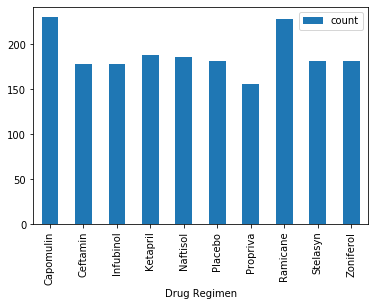

In [12]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
tumor_summary_data.plot("Drug Regimen", "count", kind = "bar" ) #https://stackoverflow.com/questions/40315878/a-convenient-way-to-plot-bar-plot-in-python-pandas


Text(0, 0.5, 'Number of mice')

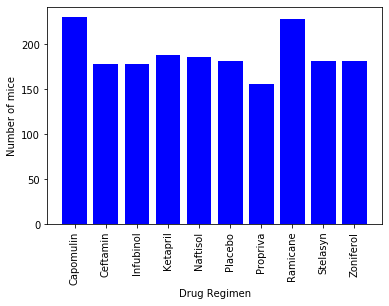

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(tumor_summary_data["Drug Regimen"], tumor_summary_data["count"], color = "b", align = "center")
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")

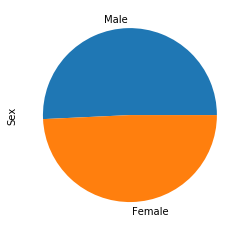

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
clean_df["Sex"].value_counts().plot(kind = "pie") #https://stackoverflow.com/questions/38337918/plot-pie-chart-and-table-of-pandas-dataframe



([<matplotlib.patches.Wedge at 0x1b29e378f08>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')])

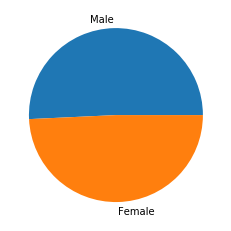

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(clean_df["Sex"].value_counts(), labels = ["Male", "Female"])


## Quartiles, Outliers and Boxplots

In [ ]:
clean_df.head()


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
max_tumor



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

merged_df = max_tumor.merge(clean_df, on = ['Mouse ID', 'Timepoint'], how = 'left')


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quantiles = final_tumor_vol.quantile([.25, .5, 0.75])
    lowerq = quantiles[0.25]
    upperq = quantiles[0.75]
    IQR = upperq - lowerq
    lowerbound = lowerq - (1.5 * IQR)
    upperbound = upperq + (1.5 * IQR)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lowerbound)| (final_tumor_vol > upperbound)]
    print(f"{drug}: {outliers}")

Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0, 0.5, 'Final Tumor Volume')

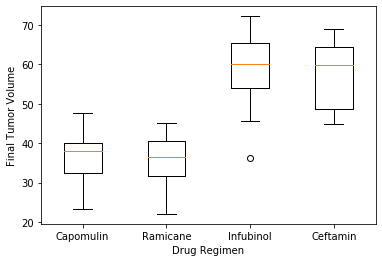

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels = treatments)
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume")

## Line and Scatter Plots

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin", :]
capomulin

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [22]:
#choosing a mouse treated with capomulin
m601 = capomulin.loc[capomulin["Mouse ID"] == 'm601', :]
m601

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
30,m601,Capomulin,Male,22,17,0,45.000000,0
31,m601,Capomulin,Male,22,17,5,41.408591,1
32,m601,Capomulin,Male,22,17,10,36.825367,1
33,m601,Capomulin,Male,22,17,15,35.464612,1
34,m601,Capomulin,Male,22,17,20,34.255732,1
35,m601,Capomulin,Male,22,17,25,33.118756,1
36,m601,Capomulin,Male,22,17,30,31.758275,1
37,m601,Capomulin,Male,22,17,35,30.834357,1
38,m601,Capomulin,Male,22,17,40,31.378045,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


Text(0, 0.5, 'Tumor Volume')

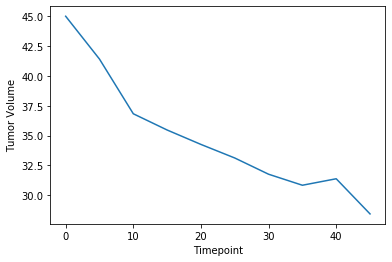

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(m601["Timepoint"], m601["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

Text(0, 0.5, 'Average Tumour Volume')

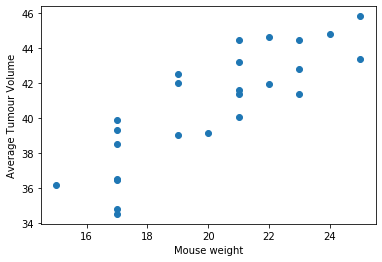

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#group by mouse ID and get mean and use it to scatterplot
scatter_data = capomulin.groupby("Mouse ID").mean()

scatter_data = pd.DataFrame(scatter_data).reset_index()

plt.scatter(scatter_data["Weight (g)"], scatter_data["Tumor Volume (mm3)"])
plt.xlabel("Mouse weight")
plt.ylabel("Average Tumour Volume")

## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
round(st.pearsonr(scatter_data["Weight (g)"], scatter_data["Tumor Volume (mm3)"])[0], 2)



0.84

In [28]:
x_values = scatter_data["Weight (g)"]
y_values = scatter_data["Tumor Volume (mm3)"]

In [29]:

from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print("slope", slope)
print("intercept", intercept)
print(x_values * slope + intercept)

slope 0.9544396890241045
intercept 21.552160532685015
0     42.549834
1     41.595394
2     37.777635
3     39.686515
4     42.549834
5     44.458713
6     40.640954
7     43.504273
8     41.595394
9     41.595394
10    39.686515
11    37.777635
12    39.686515
13    45.413153
14    37.777635
15    45.413153
16    37.777635
17    43.504273
18    37.777635
19    37.777635
20    41.595394
21    43.504273
22    41.595394
23    35.868756
24    37.777635
Name: Weight (g), dtype: float64


In [30]:
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

y = 0.95x + 21.55


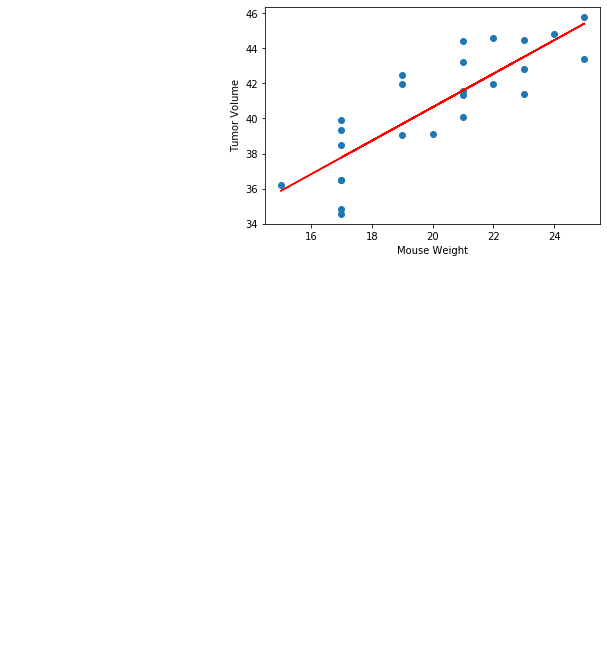

In [31]:
# Add the linear regression equation and line to plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.show()

The r-squared is: 0.7088568047708717


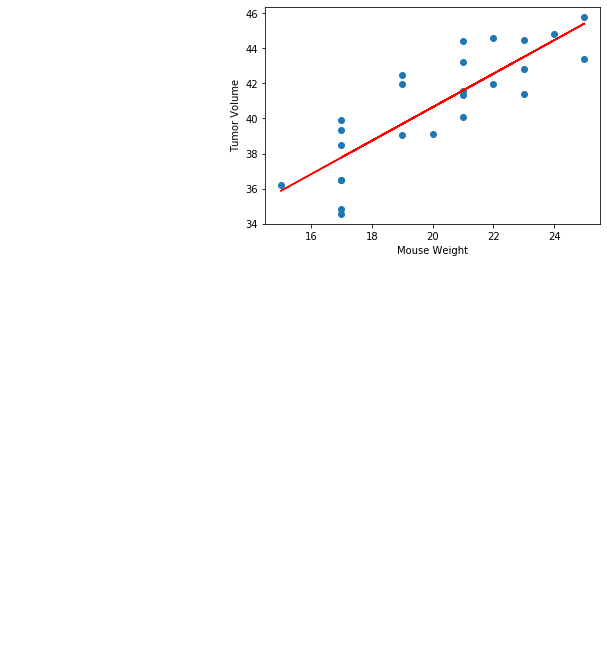

In [32]:
# Print out the r-squared value along with the plot.
x_values = scatter_data["Weight (g)"]
y_values = scatter_data["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()